<a href="https://colab.research.google.com/github/abmorte/visao-computacional/blob/main/exercicio01_anderson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title Conectando Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive




```
# Isto está formatado como código
```

###Testes com imagens



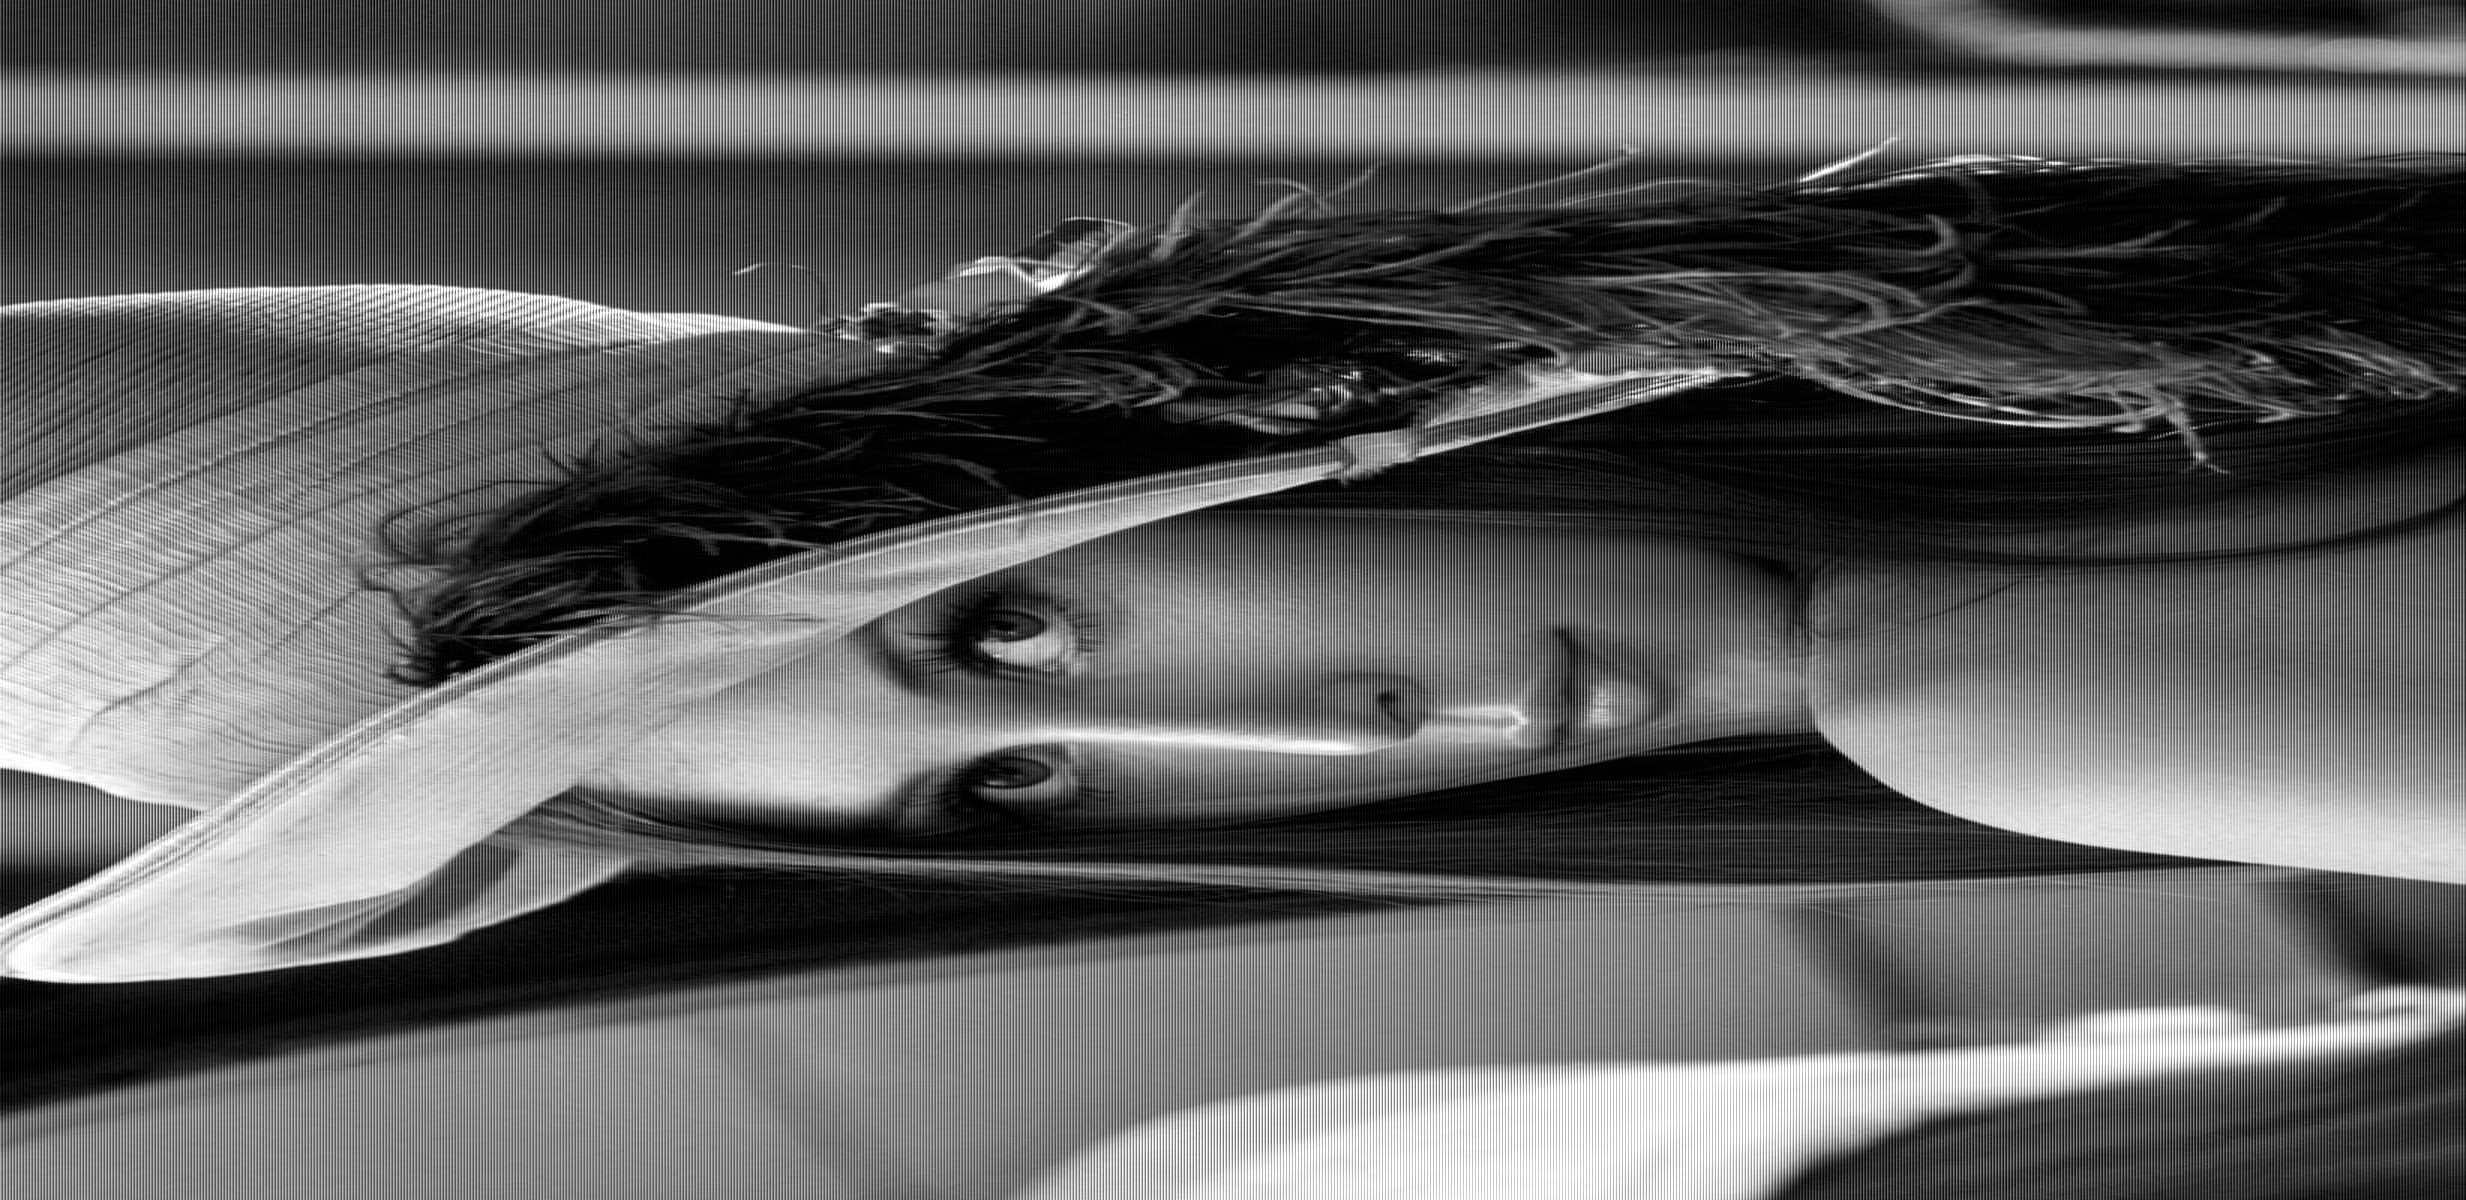

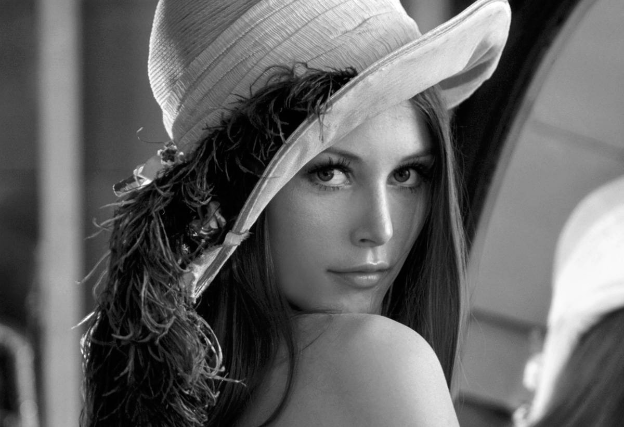

In [31]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow # for image display
from skimage import io

image_path = "/content/img/"

image = io.imread(image_path + "lena.jpg")
image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image_3 = cv.cvtColor(image, cv.COLOR_RGBA2GRAY)
final_frame = cv.hconcat(image, image_2)
cv2_imshow(final_frame)
cv2_imshow(cv.resize(image_3, None, fx=.52, fy=.52))

###Interpolação de imagens

[[  0   0   0   0   0   0   0   0   0   0]
 [ 12  12  12  12  12  12  12  12  12  12]
 [ 24  24  24  24  24  24  24  24  24  24]
 [ 36  36  36  36  36  36  36  36  36  36]
 [ 48  48  48  48  48  48  48  48  48  48]
 [ 60  60  60  60  60  60  60  60  60  60]
 [ 72  72  72  72  72  72  72  72  72  72]
 [ 84  84  84  84  84  84  84  84  84  84]
 [ 96  96  96  96  96  96  96  96  96  96]
 [108 108 108 108 108 108 108 108 108 108]]


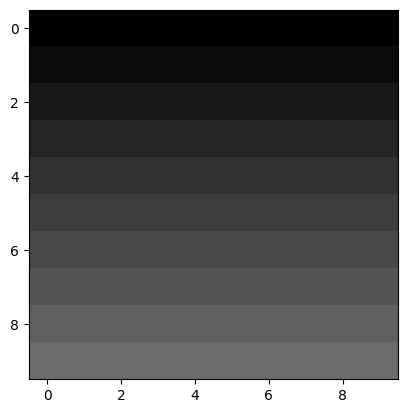

In [19]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img_10_10 = np.zeros((10, 10), dtype=np.uint8)

vi = 0
inc = 12
for i in range(0,10):
  v = vi
  for j in range(0,10):
    img_10_10[i,j] = v
    vc = v + inc
  vi = vi + inc

print(img_10_10)

plt.imshow(img_10_10, cmap="gray", vmin=0, vmax=255)
plt.show()

[[255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255

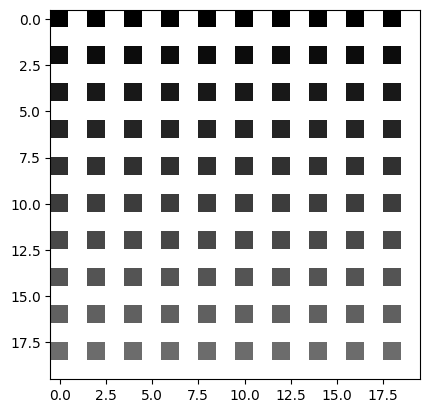

In [21]:
img_20_20 = np.full((20,20), 255, dtype=np.uint8)

print(img_20_20)
print("")

img_20_20[::2,::2] = img_10_10

print(img_20_20)

plt.imshow(img_20_20, cmap="gray", vmin=0, vmax=255)
plt.show()

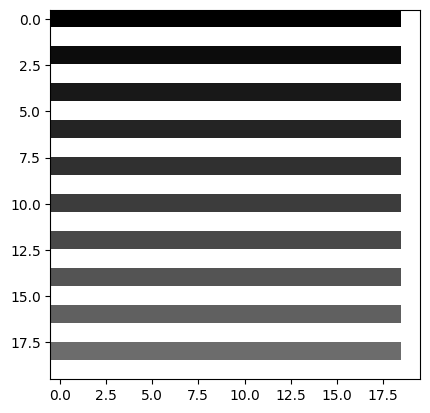

In [22]:
# Interpola as linhas
for i in range(0, 20, 2):
  indice_vazio = 1
  for j in range(0, 18, 2):
    img_20_20[i, indice_vazio] = (int)(((float)(img_20_20[i, j]) + (float)(img_20_20[i, j+2]))/2)
    indice_vazio = indice_vazio + 2

plt.imshow(img_20_20, cmap="gray", vmin=0, vmax=255)
plt.show()

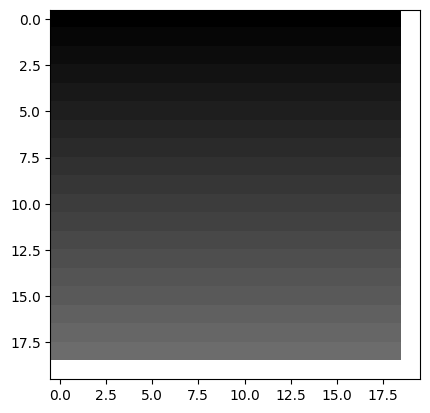

In [23]:
# Interpola as colunas
for i in range(0, 19):
  indice_vazio = 1
  for j in range(0, 18, 2):
    img_20_20[indice_vazio,i] = (int)(((float)(img_20_20[j, i]) + (float)(img_20_20[j+2, i]))/2)
    indice_vazio = indice_vazio + 2

plt.imshow(img_20_20, cmap="gray", vmin=0, vmax=255)
plt.show()

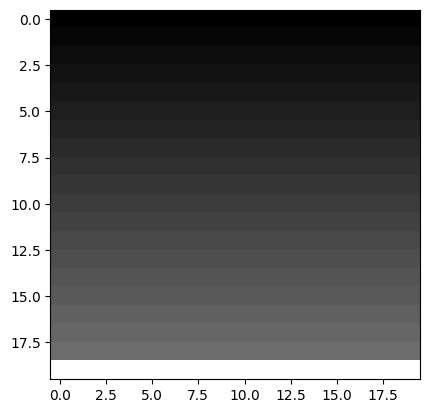

In [24]:
for i in range(0, 19):
  img_20_20[i, -1] = (int)(((float)(img_20_20[i, -3]) + (float)(img_20_20[i, -2]))/2)

plt.imshow(img_20_20, cmap="gray", vmin=0, vmax=255)
plt.show()

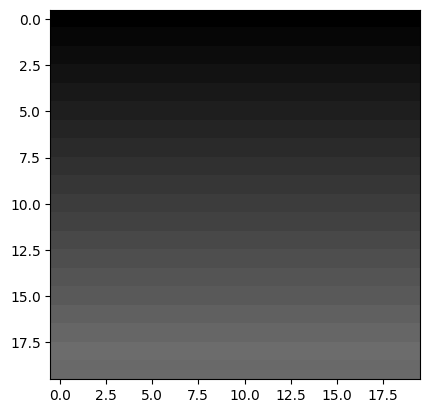

In [25]:
for i in range(0, 20):
  img_20_20[-1,i] = (int)(((float)(img_20_20[-3, i]) + (float)(img_20_20[-2, i]))/2)

plt.imshow(img_20_20, cmap="gray", vmin=0, vmax=255)
plt.show()

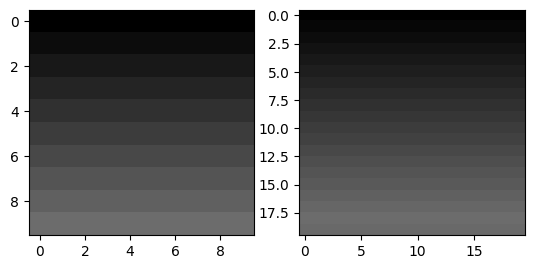

In [26]:
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(img_10_10, cmap="gray", vmin=0, vmax=255)
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(img_20_20, cmap="gray", vmin=0, vmax=255)

* Para nossa conveniencia, alguns métodos de interpolação já estão implementados no **OpenCV**

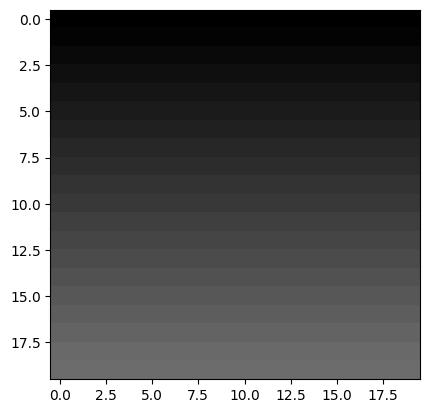

In [27]:
# Interpolação bilinear
resized_bilinear = cv.resize(img_10_10, (20,20), interpolation=cv.INTER_LINEAR)

plt.imshow(resized_bilinear, cmap="gray", vmin=0, vmax=255)
plt.show()

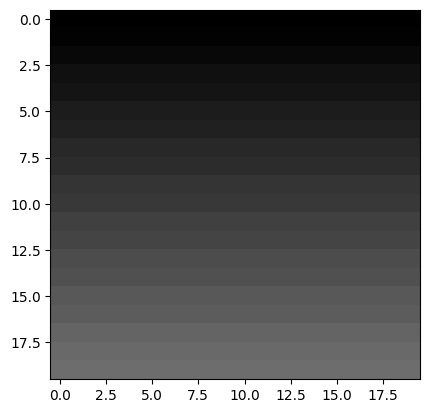

In [28]:
# Interpolação bicubica
resized_bicubica = cv.resize(img_10_10, (20,20), interpolation=cv.INTER_CUBIC)

plt.imshow(resized_bicubica, cmap="gray", vmin=0, vmax=255)
plt.show()

In [55]:
import cv2 as cv
from skimage import io
from google.colab.patches import cv2_imshow # for image display
import numpy as np
from matplotlib import pyplot as plt

image_path = "/content/img/"

[[226 225 222 ... 220 223 227]
 [217 228 235 ... 220 216 214]
 [226 227 227 ... 224 227 228]
 ...
 [224 240 243 ... 182 206 213]
 [239 236 229 ... 191 227 237]
 [250 229 221 ... 189 216 210]]


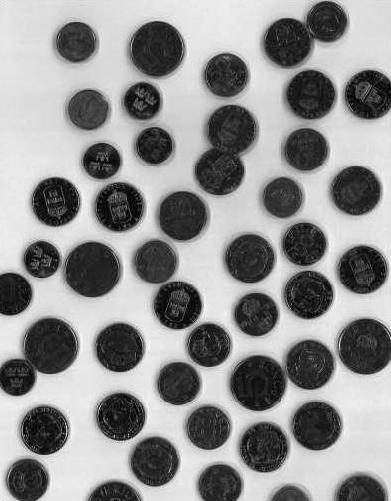

In [56]:
image = cv.cvtColor(io.imread(image_path + "coins.jpg"), cv.COLOR_RGBA2GRAY)

print(image)

cv2_imshow(image)



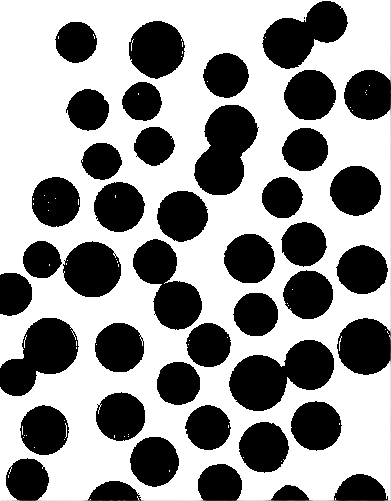

In [48]:
linha = image.shape[0]
coluna = image.shape[1]

t = 130

for i in range(0, linha - 1):
  for j in range(0, coluna - 1):
    if image[i, j] > t:
      image[i, j] = 255
    else:
      image[i, j] = 0

cv2_imshow(image)

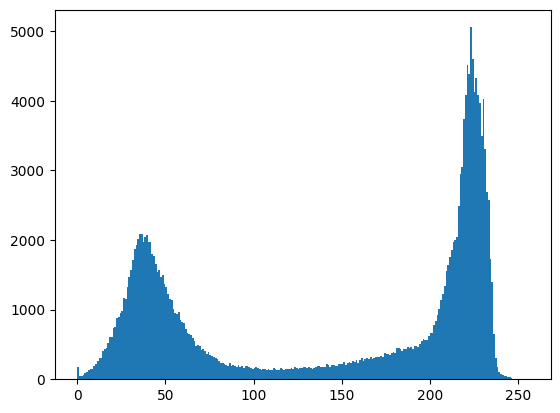

In [33]:
plt.hist(image.ravel(),256,[0,256]); plt.show()

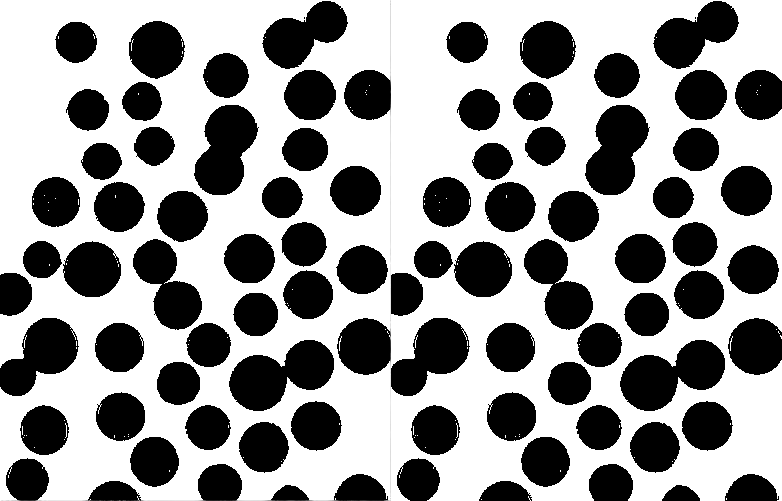

In [49]:
bin_image = image.copy()

t = 130

bin_image[bin_image > t] = 255
bin_image[bin_image <= t] = 0

final_frame = cv.hconcat((image, bin_image))

cv2_imshow(final_frame)

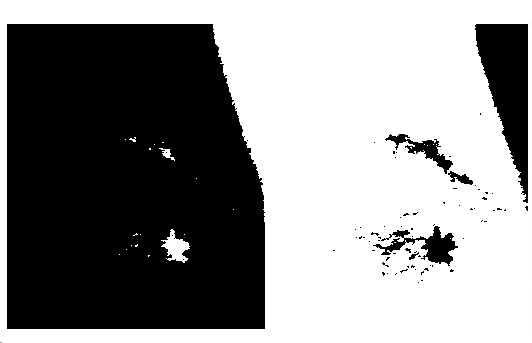

In [60]:
image = cv.cvtColor(io.imread(image_path + "breast.png"), cv.COLOR_RGBA2GRAY)

#print(image)
#cv2_imshow(image)

linha = image.shape[0]
coluna = image.shape[1]

t = 130

for i in range(0, linha - 1):
  for j in range(0, coluna - 1):
    if image[i, j] > t:
      image[i, j] = 255
    else:
      image[i, j] = 0

cv2_imshow(image)

